# **Modele de prediction de diabete**

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy pandas scikit-learn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns
import mlflow
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import joblib

In [4]:
# Afficher toutes les colonnes
pd.options.display.max_columns = None

In [5]:

# Chemin absolu vers le fichier dans Downloads
data = pd.read_csv('C:/Users/Utilisateur/Downloads/diabetes.csv')

# Afficher les premières lignes
display(data.head())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# la taille 
data.shape

(768, 9)

In [7]:
# valeur manquante
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
pourcentage_manquante = data.isnull().mean() * 100
pourcentage_manquante

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **Modele de prediction**

In [10]:
# Définir X, toutes les variable sauf 'Outcome'
x = data.drop(columns=['Outcome'])

# Définir y variable 'Outcome'
y = data['Outcome']


In [11]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:
# Diviser les données en ensembles d'entraînement et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
# Créer les préprocesseurs pour les variables quantitatives et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), x.columns),
        #('cat', OneHotEncoder(handle_unknown='ignore'), si_ya_des_variables_categoritielle)
    ]
)

# Créer le pipeline avec le préprocesseur et le modèle
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


# Définir les hyperparamètres à tester 
parameters = {
    'classifier__n_estimators': [100, 200],   # Nombre d'arbres dans la forêt
    'classifier__max_depth': [None, 10, 20],   # Profondeur maximale des arbres
    'classifier__min_samples_split': [2, 5],   # Nombre minimum d'échantillons requis pour diviser un noeud
    'classifier__min_samples_leaf': [1, 2],    # Nombre minimum d'échantillons par feuille
}

In [16]:
from sklearn.model_selection import GridSearchCV
# Effectuer une recherche sur grille pour optimiser les hyperparamètres
grid_search = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Entraîner le modèle avec GridSearch
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]})

In [17]:
# Afficher les resultats

resultat = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")
resultat

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_depth,param_classifier__min_samples_leaf,param_classifier__min_samples_split,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.441435,0.071797,0.017881,0.005201,None,1,5,100,"{'classifier__max_depth': None, 'classifier__m...",0.764228,0.837398,0.747967,0.764228,0.803279,0.783420,0.032563,1
18,0.303333,0.043638,0.016525,0.003344,20,1,5,100,"{'classifier__max_depth': 20, 'classifier__min...",0.764228,0.837398,0.747967,0.764228,0.803279,0.783420,0.032563,1
21,0.713931,0.095504,0.025600,0.009169,20,2,2,200,"{'classifier__max_depth': 20, 'classifier__min...",0.780488,0.821138,0.772358,0.739837,0.778689,0.778502,0.025902,3
5,0.763756,0.169138,0.029668,0.014015,None,2,2,200,"{'classifier__max_depth': None, 'classifier__m...",0.780488,0.821138,0.772358,0.739837,0.778689,0.778502,0.025902,3
10,0.354903,0.038879,0.012856,0.002427,10,1,5,100,"{'classifier__max_depth': 10, 'classifier__min...",0.756098,0.829268,0.756098,0.739837,0.803279,0.776916,0.033697,5
1,1.004976,0.082954,0.037326,0.008343,None,1,2,200,"{'classifier__max_depth': None, 'classifier__m...",0.788618,0.804878,0.747967,0.756098,0.786885,0.776889,0.021399,6
17,0.614660,0.082305,0.020654,0.006037,20,1,2,200,"{'classifier__max_depth': 20, 'classifier__min...",0.788618,0.804878,0.747967,0.756098,0.786885,0.776889,0.021399,6
14,0.368251,0.068906,0.016670,0.005674,10,2,5,100,"{'classifier__max_depth': 10, 'classifier__min...",0.764228,0.829268,0.747967,0.739837,0.795082,0.775277,0.032958,8
12,0.303355,0.029763,0.009718,0.005312,10,2,2,100,"{'classifier__max_depth': 10, 'classifier__min...",0.764228,0.821138,0.764228,0.731707,0.795082,0.775277,0.030456,8
0,0.505793,0.075019,0.027501,0.015009,None,1,2,100,"{'classifier__max_depth': None, 'classifier__m...",0.788618,0.796748,0.723577,0.747967,0.811475,0.773677,0.032727,10


In [18]:
# Afficher les résultats avec les meilleurs paramètres
print("Meilleur score (test) :", grid_search.best_score_)
print("Meilleurs paramètres :", grid_search.best_params_)

Meilleur score (test) : 0.7834199653471945
Meilleurs paramètres : {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}


# **Faire des prédictions sur le jeu d'entraînement et le jeu de test**

In [19]:
# Prédictions sur l'ensemble d'entraînement
y_train_pred = grid_search.predict(x_train)

# Prédictions sur l'ensemble de test
y_test_pred = grid_search.predict(x_test)
 # Prédictions sur l'ensemble de test

In [20]:
y_train_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [21]:
y_test_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

# **Afficher les performance du modele**

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score

In [23]:
# Calculer la précision pour l'ensemble d'entraînement et de test
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Afficher les matrices de confusion pour l'ensemble d'entraînement et de test
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculer l'AUC pour l'ensemble d'entraînement et l'ensemble de test
train_auc = roc_auc_score(y_train, grid_search.predict_proba(x_train)[:, 1])
test_auc = roc_auc_score(y_test, grid_search.predict_proba(x_test)[:, 1])

# Calculer le Recall pour l'ensemble d'entraînement et l'ensemble de test
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

In [24]:
# Créer le DataFrame performance_totale avec toutes les métriques
performance_totale = pd.DataFrame({
    'Metric': ['Accuracy', 'AUC', 'Recall'],
    'Train': [train_accuracy, train_auc, train_recall],
    'Test': [test_accuracy, test_auc, test_recall]
})

# Afficher le tableau final
print(performance_totale)

     Metric     Train      Test
0  Accuracy  0.991857  0.740260
1       AUC  0.999848  0.812121
2    Recall  0.981221  0.654545


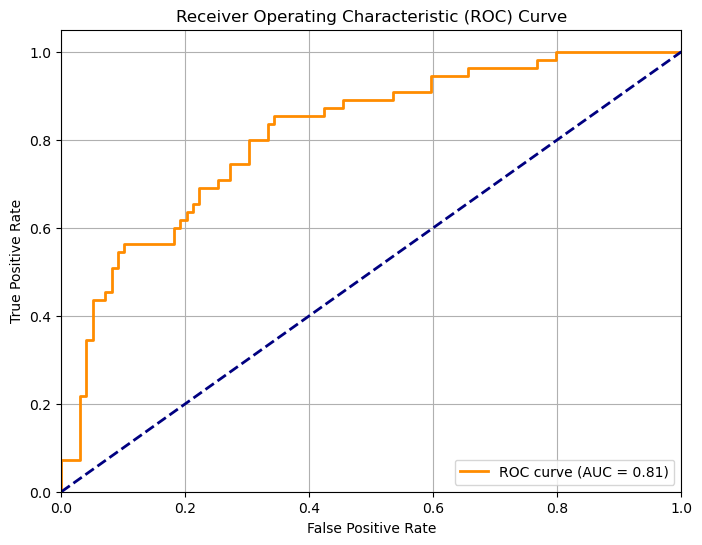

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculer les probabilités prédites pour l'ensemble de test (probabilités de classe positive)
y_test_prob = grid_search.predict_proba(x_test)[:, 1]  # On prend la probabilité pour la classe 1

# Calculer les courbes ROC pour l'ensemble de test
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Calculer l'AUC
roc_auc = auc(fpr, tpr)

# Visualiser la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Ligne diagonale (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


Importance des variables :
                   Variable  Importance
1                   Glucose    0.271172
5                       BMI    0.174974
7                       Age    0.147075
6  DiabetesPedigreeFunction    0.111973
2             BloodPressure    0.082001
4                   Insulin    0.076043
0               Pregnancies    0.074109
3             SkinThickness    0.062652


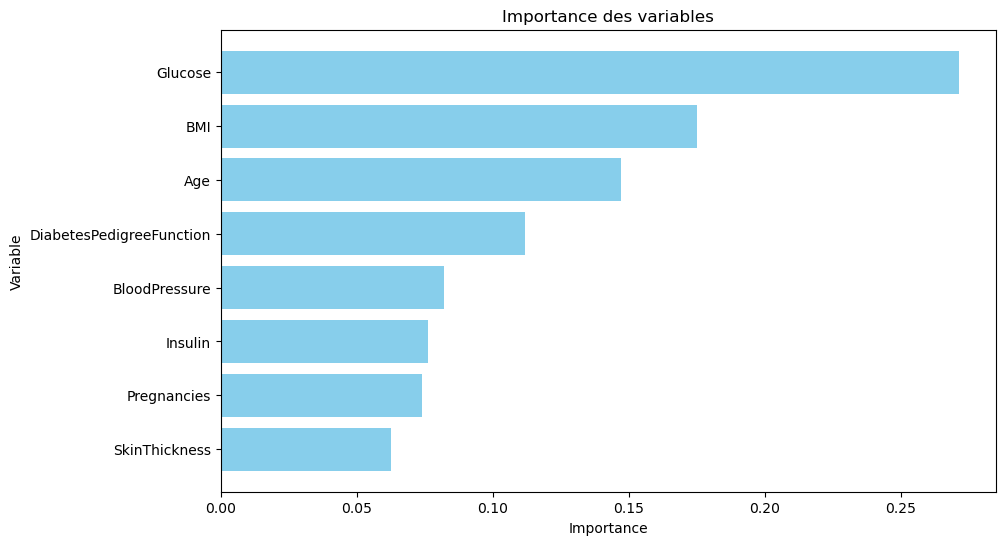

In [26]:
random_forest = grid_search.best_estimator_.named_steps['classifier']

# Obtenir l'importance des variables à partir du modèle entraîné
importance = random_forest.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({
    'Variable': x_train.columns,  
    'Importance': importance
})

# Trier les importances par ordre décroissant
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)

# Tracer l'importance des variables
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Variable'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Importance des variables')
plt.gca().invert_yaxis()  
plt.show()


# **Enregistrer le modèle avec joblib**

In [27]:
import joblib

# Enregistrer le modèle entraîné
joblib.dump(grid_search.best_estimator_, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [28]:
# Charger le modèle enregistré
model = joblib.load('random_forest_model.pkl')